In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\iris_raw.csv")
dataset.head(5)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


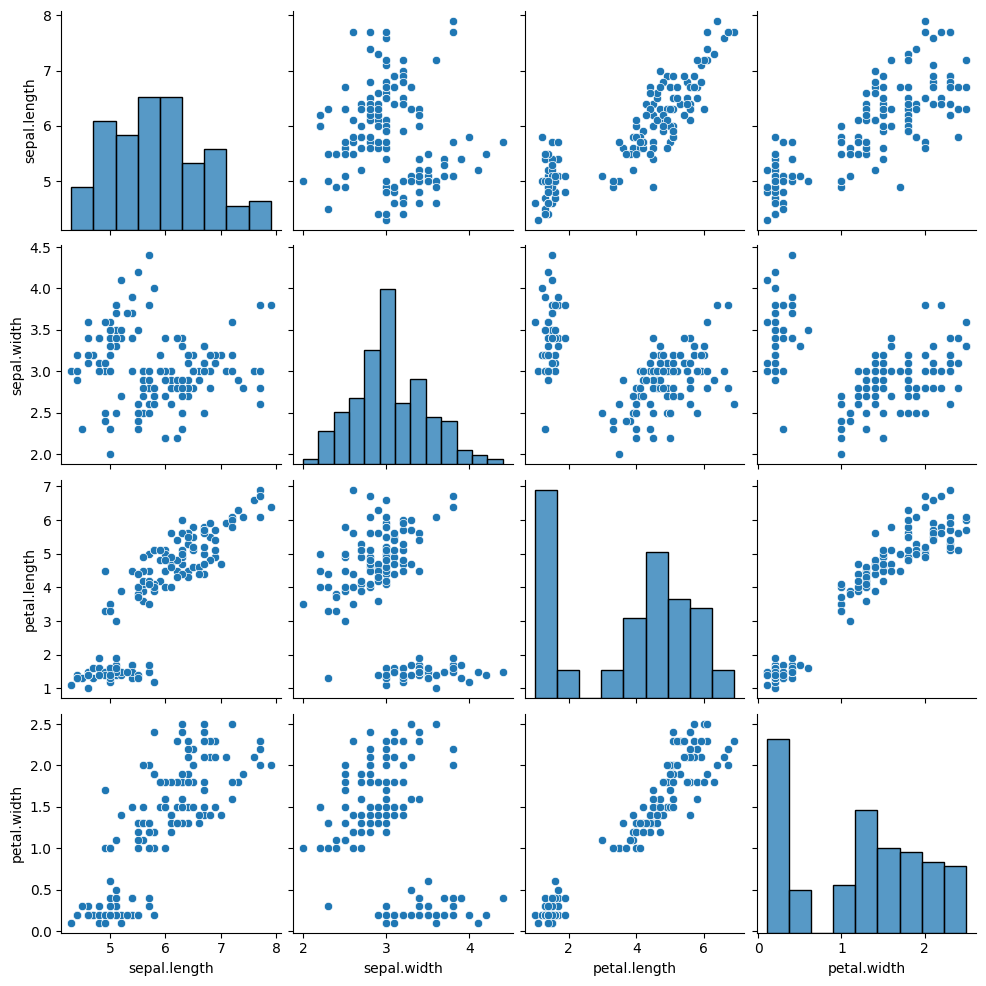

In [3]:
#graphical analysis:
#to check if data is linearly seperable or not:
sns.pairplot(data=dataset)
plt.show()

In [4]:
#by look of it;2clusters should be formed
#but we know that in reality there are 3 clusters
#here data cant be splitted into train and test but only within clusters

from sklearn.cluster import KMeans

In [5]:
wcss=[]

for i in range(2,21):
    km=KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)#gives wcss value

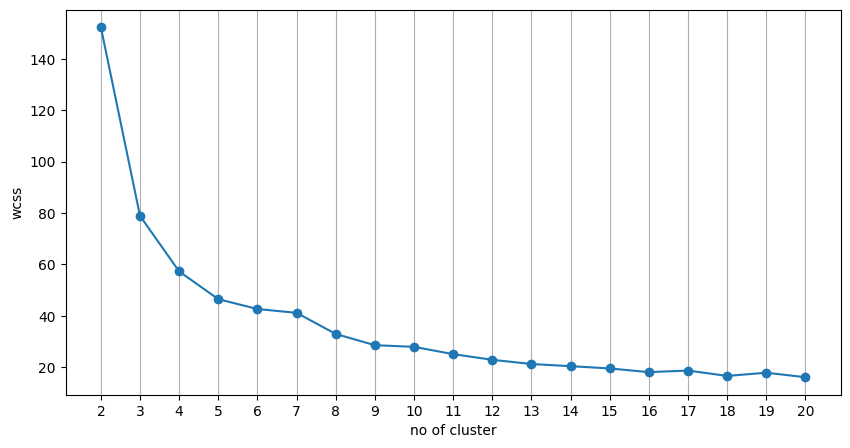

In [13]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)], wcss, marker="o")
plt.xlabel("no of cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis="x")
plt.show()

In [14]:
#here elbow point=3
kmn=KMeans(n_clusters=3)
dataset["predict"]=kmn.fit_predict(dataset)

In [ ]:
kmn.labels_
#tells about the prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

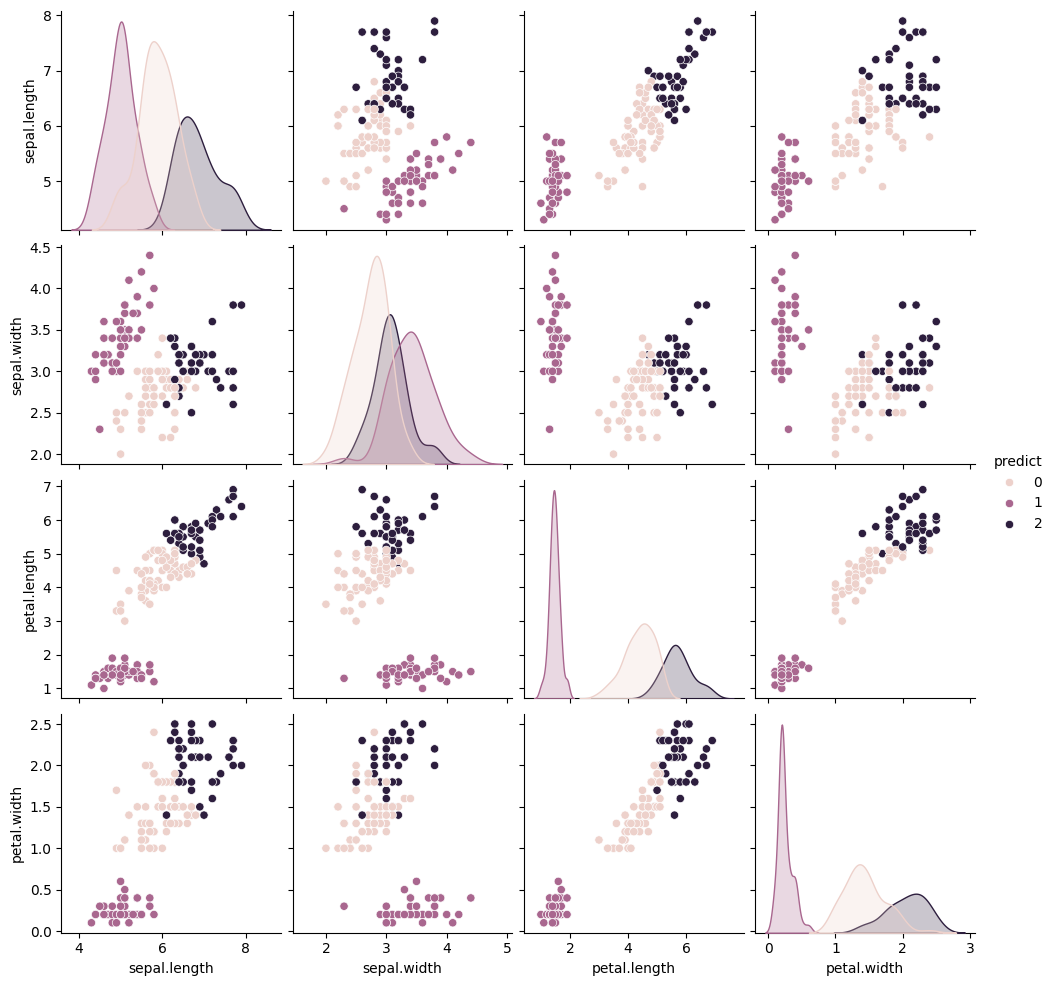

In [20]:
sns.pairplot(data=dataset, hue="predict")
plt.savefig("iris-predict.jpg")
plt.show()

In [18]:
org_dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\Iris.csv")
org_dataset.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


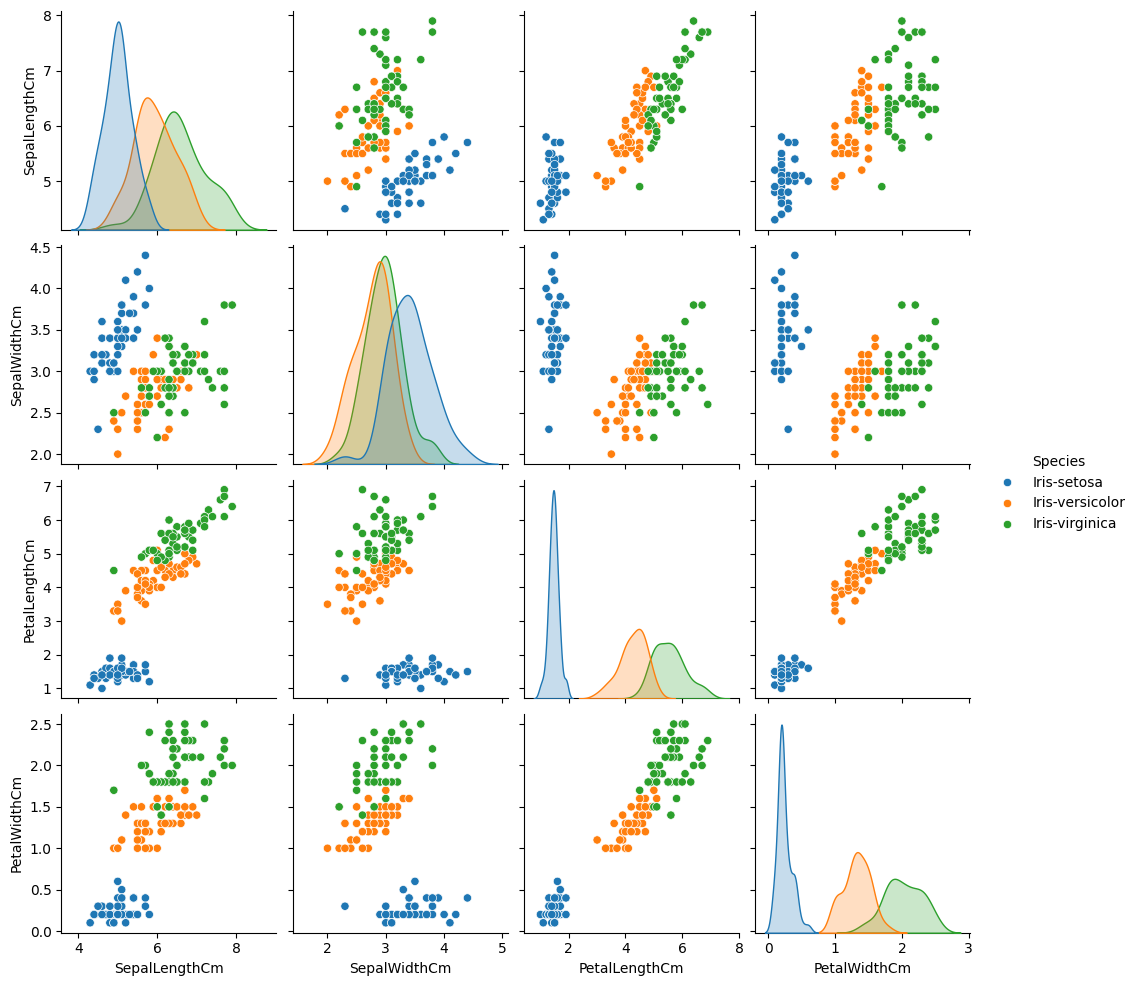

In [21]:
sns.pairplot(data=org_dataset, hue="Species")
plt.savefig("iris-original.jpg")
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(dataset, labels=kmn.labels_)
#since the value is closer to 1; our prediction of 3 clusters is correct

np.float64(0.68468524942902)

In [27]:
#better checking by running loop and creating graph
ss=[]
no_of_clusters=[j for j in range(2,21)]
for i in range(2,21):
    km1=KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset, km1.labels_))


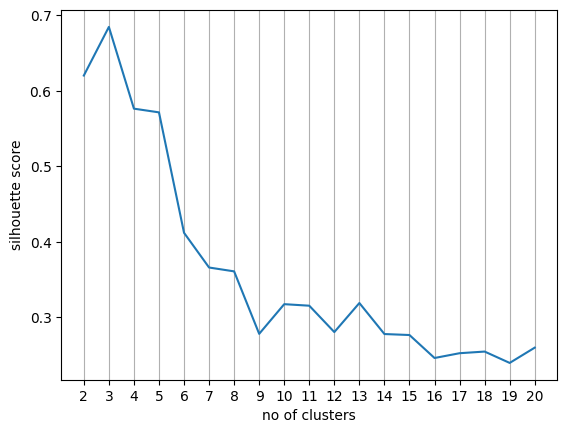

In [30]:
plt.plot(no_of_clusters, ss)
plt.xlabel("no of clusters")
plt.ylabel("silhouette score")
plt.xticks(no_of_clusters)
plt.grid(axis="x")
plt.show()